## Set Up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### For Logistic Regression

In [185]:
# Model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline

### For XGBoost

In [190]:
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from scipy.stats import uniform, randint
import optuna

## Data Understanding & Preparation

In [6]:
df = pd.read_csv("HR-Employee.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [7]:
df.info()
print("\nDataset shape:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [8]:
# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


In [9]:
# Check unique values per column
print("\nUnique values per column:")
print(df.nunique())


Unique values per column:
Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPr

In [10]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [18]:
# Separate categorical and numerical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()
for c in num_cols:
    df[c] = df[c].fillna(df[c].median() )

for c in cat_cols:
    df[c] = df[c].fillna(df[c].mode()[0])
numeric_features = df.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object','category']).columns.tolist()

for col in ['Attrition','Attrition_Yes']:
    if col in numeric_features:
        numeric_features.remove(col)
    if col in categorical_features:
        categorical_features.remove(col)

print("Numeric features:", len(numeric_features))
print(numeric_features[:10])
print("Categorical features:", len(categorical_features))
print(categorical_features[:10])

Numeric features: 23
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome']
Categorical features: 7
['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


## Attrition

In [19]:
# prepare the target
if 'Attrition' in df.columns:
    df['Attrition_Yes'] = df['Attrition'].map({'Yes':1, 'No':0})
else:
    raise ValueError("Target column 'Attrition' not found. غيّر الاسم لو مختلف.")

X = df.drop(columns=['Attrition','Attrition_Yes'], errors='ignore') 
y = df['Attrition_Yes']

# Check target variable distribution
print("X shape:", X.shape, "y distribution:\n", y.value_counts())

X shape: (1470, 30) y distribution:
 Attrition_Yes
0    1233
1     237
Name: count, dtype: int64


## Encoding

In [29]:
# create preprocessor
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'  
)

In [39]:
# checking.....
print("Total missing values:", df_encoded.isnull().sum().sum())

df_encoded.dtypes.value_counts()

Total missing values: 0


int64    24
bool     22
Name: count, dtype: int64

## Model Training 

In [24]:
# Data will be 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.2, random_state=42, stratify=y
)
# Training and Test shapes 
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (1176, 30)
Test set shape: (294, 30)


## Logistic Regression

In [44]:
# Create the Model and Train it
X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)
log_model = LogisticRegression(max_iter=1000, random_state=42)

log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)


Accuracy: 0.8605
Precision: 0.6875
Recall: 0.2340
F1-score: 0.3492


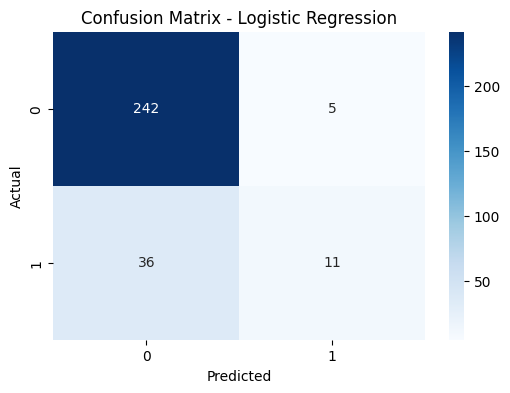


Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       247
           1       0.69      0.23      0.35        47

    accuracy                           0.86       294
   macro avg       0.78      0.61      0.64       294
weighted avg       0.84      0.86      0.83       294



In [45]:
# Determining (Accuracy-Precision-Recall-F1) 
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the Results 
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")     
print(f"F1-score: {f1:.4f}")   #Avrage between Acuuracy and Recall 

# Confusion Matrix To clarify Model Preformance 
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Print the final report 
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


### The model suffers from imbalance as recall only 0.106 and F1 0.19 which is very low 
### we are going to test if the model have OVERfitting or UNDERfitting 
### if Train Accuracy > Test Accuracy then the model have OVERfitting 

In [46]:
y_train_pred = log_model.predict(X_train)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Train Accuracy: 0.8681972789115646
Test Accuracy: 0.8605442176870748


### Balancing

In [48]:
# scale numeric features if needed (we assume all features numeric after get_dummies)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with class_weight balanced
lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
print("Logistic (class_weight) performance:")
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:,1]))


Logistic (class_weight) performance:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       247
           1       0.35      0.62      0.44        47

    accuracy                           0.75       294
   macro avg       0.63      0.70      0.64       294
weighted avg       0.82      0.75      0.78       294

ROC AUC: 0.7982599707123783


### Smote

Logistic + SMOTE CV F1 scores: [0.542 0.475 0.52  0.486 0.505]
Mean F1: 0.506

Test set classification report (Logistic+SMOTE):
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       247
           1       0.37      0.60      0.46        47

    accuracy                           0.78       294
   macro avg       0.64      0.70      0.66       294
weighted avg       0.83      0.78      0.79       294

ROC AUC: 0.7854251012145749


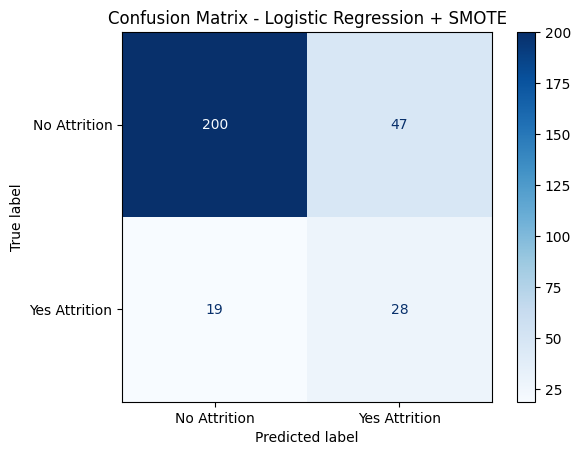

In [49]:
# pipeline: scaler -> SMOTE -> classifier
smote = SMOTE(random_state=42)
pipe_lr_smote = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

# quick CV to estimate
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipe_lr_smote, X_train, y_train, cv=cv, scoring='f1', n_jobs=-1)
print("Logistic + SMOTE CV F1 scores:", np.round(scores,3))
print("Mean F1:", np.round(scores.mean(),3))

# fit & evaluate on test
pipe_lr_smote.fit(X_train, y_train)
y_pred = pipe_lr_smote.predict(X_test)
print("\nTest set classification report (Logistic+SMOTE):")
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, pipe_lr_smote.predict_proba(X_test)[:,1]))


# Show the new results
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = pipe_lr_smote.predict(X_test)

ConfusionMatrixDisplay.from_estimator(
    pipe_lr_smote, X_test, y_test,
    display_labels=["No Attrition", "Yes Attrition"],
    cmap="Blues",
    values_format='d'
)
plt.title("Confusion Matrix - Logistic Regression + SMOTE")
plt.show()


### we enhanced the model performance in recall and avrage F1 but Accueacy decreased 
### So we are going to try another model

## Random Forest 

### SMOTE

In [50]:
pipe_rf_smote = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
   
    ('rf', RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    ))
])

In [51]:
# Train The model
pipe_rf_smote.fit(X_train, y_train)

# prediction
y_pred_rf = pipe_rf_smote.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print("=== Random Forest + SMOTE ===")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
try:
    print("ROC AUC:", roc_auc_score(y_test, pipe_rf_smote.predict_proba(X_test)[:,1]))
except:
    pass

=== Random Forest + SMOTE ===
[[230  17]
 [ 35  12]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       247
           1       0.41      0.26      0.32        47

    accuracy                           0.82       294
   macro avg       0.64      0.59      0.61       294
weighted avg       0.80      0.82      0.81       294

ROC AUC: 0.7454991816693944


### Low senstive in recall...

## XG BOOST

In [55]:
# Build the model
xgb_model = XGBClassifier(
    n_estimators=200,       # number of trees
    learning_rate=0.05,     
    max_depth=6,            # tree's depth
    subsample=0.8,          # samples used per tree
    colsample_bytree=0.8,   # columns used per tree
    random_state=42,
    scale_pos_weight=3     
)
# Train the model
xgb_model.fit(X_train, y_train)

# prediction
y_pred_xgb = xgb_model.predict(X_test)

### Low recall so we will create GridsearchCV to make balance

In [53]:
xgb_base = XGBClassifier(random_state=42)
# We will search in.........
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 2, 3, 5]
}
# create GridSearchCV
grid_xgb = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring='f1',        # F1 responsible for balancing between precision and recall
    cv=3,                # 3-fold cross validation
    verbose=2,
    n_jobs=-1            # to icrease search speed
)
# train GridSearchCV
grid_xgb.fit(X_train, y_train)
print(" GridSearchCV Parameters:", grid_xgb.best_params_)

GridSCV_xgb = grid_xgb.best_estimator_

# prediction
y_pred_best = GridSCV_xgb.predict(X_test)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
 GridSearchCV Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100, 'scale_pos_weight': 5, 'subsample': 0.8}


              precision    recall  f1-score   support

           0       0.90      0.86      0.88       247
           1       0.41      0.51      0.45        47

    accuracy                           0.80       294
   macro avg       0.65      0.68      0.67       294
weighted avg       0.82      0.80      0.81       294


 GridSearchCV XGBoost Model Performance:
Accuracy: 0.8027
Precision: 0.4068
Recall: 0.5106
F1-score: 0.4528


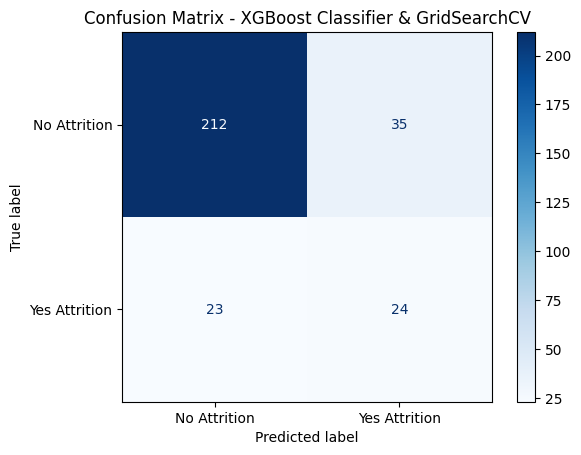

ROC AUC: 0.7703505900594366


In [54]:
# Performance evaluation
acc_best = accuracy_score(y_test, y_pred_best)
prec_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
print(classification_report(y_test, y_pred_best, zero_division=0))
print("\n GridSearchCV XGBoost Model Performance:")
print(f"Accuracy: {acc_best:.4f}")
print(f"Precision: {prec_best:.4f}")
print(f"Recall: {recall_best:.4f}")
print(f"F1-score: {f1_best:.4f}")

ConfusionMatrixDisplay.from_estimator(
    GridSCV_xgb, X_test, y_test,
    display_labels=["No Attrition", "Yes Attrition"],
    cmap="Blues",
    values_format='d'
)
plt.title("Confusion Matrix - XGBoost Classifier & GridSearchCV")
plt.show()

print("ROC AUC:", roc_auc_score(y_test, GridSCV_xgb.predict_proba(X_test)[:,1]))

### Tuning The Model

#### 1-RandomizedSearchCV

In [166]:
xgb_base = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(2, 15),
    'learning_rate': uniform(0.01, 0.5),
    'subsample': uniform(0.4, 0.9),
    'colsample_bytree': uniform(0.4, 0.9),
    'gamma': uniform(0, 5),
    'min_child_weight': randint(1, 8)
}
random_search = RandomizedSearchCV(
    xgb_base,
    param_distributions=param_dist,
    n_iter=40,             
    scoring='f1',
    n_jobs=-1,
    cv=3,
    verbose=2,
    random_state=42
)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


,estimator,"XGBClassifier...ree=None, ...)"
,param_distributions,"{'colsample_bytree': <scipy.stats....001CED7301510>, 'gamma': <scipy.stats....001CED736B210>, 'learning_rate': <scipy.stats....001CED73EA4D0>, 'max_depth': <scipy.stats....001CED749FED0>, ...}"
,n_iter,40
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [176]:
print("Best parameters found by RandomizedSearchCV:")
print(random_search.best_params_)
print(f"Best F1 Score: {random_search.best_score_:.4f}")
xgb_random = random_search.best_estimator_
accuracy = accuracy_score(y_test, xgb_random.predict(X_test))                         
precision = precision_score(y_test, xgb_random.predict(X_test))
recall = recall_score(y_test, xgb_random.predict(X_test))
f1 = f1_score(y_test, xgb_random.predict(X_test))
roc_auc = roc_auc_score(y_test, xgb_random.predict_proba(X_test)[:,1])
print(f"🎯 Accuracy:  {accuracy:.4f}")
print(f"📍 Precision: {precision:.4f}")
print(f"📈 Recall:    {recall:.4f}")
print("ROC AUC:", roc_auc_score(y_test, xgb_random.predict_proba(X_test)[:,1]))

Best parameters found by RandomizedSearchCV:
{'colsample_bytree': np.float64(0.43639023058458826), 'gamma': np.float64(3.553314448428937), 'learning_rate': np.float64(0.06544541040591566), 'max_depth': 13, 'min_child_weight': 5, 'n_estimators': 790, 'subsample': np.float64(0.42828626711806084)}
Best F1 Score: 0.5266
🎯 Accuracy:  0.8571
📍 Precision: 0.6000
📈 Recall:    0.3191
ROC AUC: 0.8222930484968559


#### 2-Bayesian Optimization Using Optuna

In [138]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBClassifier(
        random_state=42,
        eval_metric='logloss',
        use_label_encoder=False
    ))
])

In [163]:
def objective(trial):
    params = {
        'model__n_estimators': trial.suggest_int('n_estimators', 200, 1000),
        'model__max_depth': trial.suggest_int('max_depth', 2, 15),
        'model__learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
        'model__subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'model__colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'model__gamma': trial.suggest_float('gamma', 0, 5),
        'model__min_child_weight': trial.suggest_int('min_child_weight', 1, 10)
    }

    pipe.set_params(**params)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(pipe, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
    return np.mean(scores)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=40, show_progress_bar=True)

print("Optuna best params:", study.best_params)
print("Optuna best F1:", study.best_value)

best_params_fixed = {}
for key, value in study.best_params.items():
    best_params_fixed[f'model__{key}'] = value

print("Fixed best params:", best_params_fixed)

pipe.set_params(**best_params_fixed)
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print("Final Model Performance:")
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, pipe.predict_proba(X_test)[:,1]))

[I 2025-10-25 17:36:12,013] A new study created in memory with name: no-name-400a78ed-927f-4f98-b870-985e211a15aa


  0%|          | 0/40 [00:00<?, ?it/s]

[I 2025-10-25 17:36:12,283] Trial 0 finished with value: 0.5016730708095907 and parameters: {'n_estimators': 658, 'max_depth': 15, 'learning_rate': 0.14283984551465728, 'subsample': 0.7518095580674908, 'colsample_bytree': 0.9649357005115891, 'gamma': 0.34274466361824574, 'min_child_weight': 6}. Best is trial 0 with value: 0.5016730708095907.
[I 2025-10-25 17:36:12,438] Trial 1 finished with value: 0.508926107286763 and parameters: {'n_estimators': 311, 'max_depth': 12, 'learning_rate': 0.05007189219403705, 'subsample': 0.6349601011092726, 'colsample_bytree': 0.8984810668461283, 'gamma': 0.32845873580430063, 'min_child_weight': 7}. Best is trial 1 with value: 0.508926107286763.
[I 2025-10-25 17:36:12,594] Trial 2 finished with value: 0.4387357265776653 and parameters: {'n_estimators': 556, 'max_depth': 2, 'learning_rate': 0.04862822736926608, 'subsample': 0.863756154414852, 'colsample_bytree': 0.7139544268645805, 'gamma': 3.4047090329253287, 'min_child_weight': 3}. Best is trial 1 with 

In [ ]:
best_xgb_hybrid = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    **study.best_params
)

best_xgb_hybrid.fit(X_train, y_train)


y_pred = best_xgb_hybrid.predict(X_test)
y_prob = best_xgb_hybrid.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print("\n=== Final Hybrid Model Performance ===")
print(classification_report(y_test, y_pred, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))



=== Final Hybrid Model Performance ===
              precision    recall  f1-score   support

           0     0.8848    0.9636    0.9225       247
           1     0.6400    0.3404    0.4444        47

    accuracy                         0.8639       294
   macro avg     0.7624    0.6520    0.6835       294
weighted avg     0.8456    0.8639    0.8461       294

Confusion Matrix:
 [[238   9]
 [ 31  16]]
ROC AUC: 0.8101472995090016


## Soft Voting + Weighted Voting + Stacking

Checking required variables...

Fitting base models (this may take a bit)...
Fitting Logistic ...
Fitting RandomForest ...
Fitting XGBoost ...
Base models fitted.

=== Logistic ===
              precision    recall  f1-score   support

           0     0.9132    0.8097    0.8584       247
           1     0.3733    0.5957    0.4590        47

    accuracy                         0.7755       294
   macro avg     0.6433    0.7027    0.6587       294
weighted avg     0.8269    0.7755    0.7945       294

ROC AUC: 0.7854

=== RandomForest ===
              precision    recall  f1-score   support

           0     0.8679    0.9312    0.8984       247
           1     0.4138    0.2553    0.3158        47

    accuracy                         0.8231       294
   macro avg     0.6409    0.5932    0.6071       294
weighted avg     0.7953    0.8231    0.8053       294

ROC AUC: 0.7455

=== XGBoost ===
              precision    recall  f1-score   support

           0     0.8815    0.9636    0.

,model,roc_auc,f1,recall,precision,accuracy
2,XGBoost,0.820656,0.422535,0.319149,0.625000,0.860544
5,Stacking,0.817814,0.516129,0.680851,0.415584,0.795918
3,Voting,0.813248,0.517647,0.468085,0.578947,0.860544
4,WeightedAvg,0.812301,0.517647,0.468085,0.578947,0.860544
0,Logistic,0.785425,0.459016,0.595745,0.373333,0.775510
1,RandomForest,0.745499,0.315789,0.255319,0.413793,0.823129


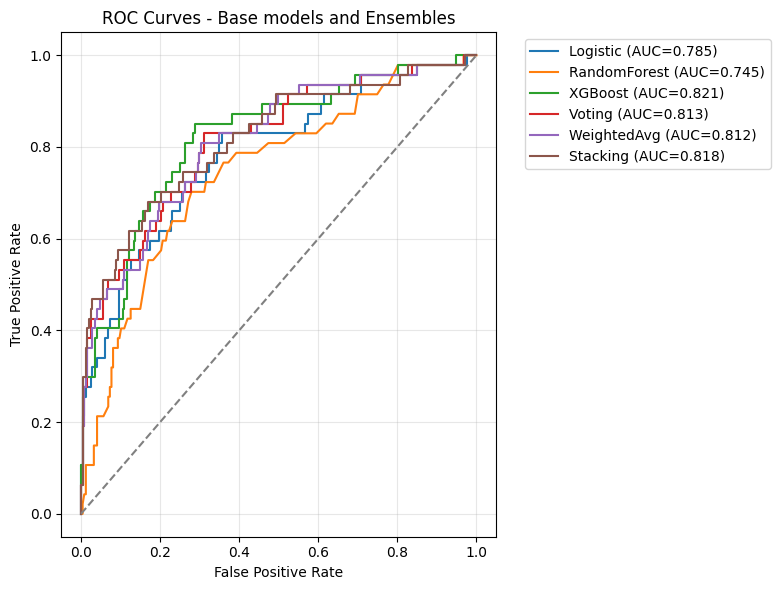


Best by ROC AUC: XGBoost (AUC=0.8207)
Saved best ensemble to: best_ensemble_XGBoost.joblib


In [186]:
# ===== Ensemble & Evaluation Cell =====
print("Checking required variables...")

missing = []
for name in ['pipe_lr_smote','pipe_rf_smote','xgb_random','X_train','X_test','y_train','y_test']:
    if name not in globals():
        missing.append(name)
if missing:
    raise NameError(f"Missing required objects in the notebook: {missing}. Define them before running this cell.")

RND = 42

# 1) Wrap xgb_random into a pipeline if not already a pipeline
try:
    # if xgb_random is an estimator (not pipeline), create pipeline_xgb
    if isinstance(xgb_random, ImbPipeline):
        pipe_xgb = xgb_random
    else:
        pipe_xgb = ImbPipeline([
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=RND)),
            ('clf', xgb_random)
        ])
except Exception as e:
    raise RuntimeError("Error creating XGB pipeline: " + str(e))

# 2) List base pipelines
models = {
    'Logistic': pipe_lr_smote,
    'RandomForest': pipe_rf_smote,
    'XGBoost': pipe_xgb
}

# 3) Fit each base pipeline (safe: will refit; if already fitted sklearn will re-fit)
print("\nFitting base models (this may take a bit)...")
for name, pipe in models.items():
    print(f"Fitting {name} ...")
    pipe.fit(X_train, y_train)
print("Base models fitted.")

# 4) Evaluate each base model on test set and store probs
results = {}
for name, pipe in models.items():
    y_pred = pipe.predict(X_test)
    if hasattr(pipe, "predict_proba"):
        y_proba = pipe.predict_proba(X_test)[:,1]
    else:
        # if pipeline doesn't expose predict_proba, try underlying clf
        try:
            y_proba = pipe.named_steps['clf'].predict_proba(pipe.named_steps['scaler'].transform(X_test))[:,1]
        except Exception:
            y_proba = np.zeros(len(y_test))
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc = roc_auc_score(y_test, y_proba) if np.unique(y_proba).size>1 else np.nan
    results[name] = {'model':pipe, 'y_pred':y_pred, 'y_proba':y_proba, 'acc':acc, 'prec':prec, 'rec':rec, 'f1':f1, 'roc':roc}
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, digits=4))
    print(f"ROC AUC: {roc:.4f}")

# 5) Soft Voting ensemble (equal weights)
# Note: VotingClassifier expects base estimators (named, estimator). We'll pass the pipelines directly.
print("\nBuilding VotingClassifier (soft)...")
voting = VotingClassifier(estimators=[
    ('lr', pipe_lr_smote),
    ('rf', pipe_rf_smote),
    ('xgb', pipe_xgb)
], voting='soft', n_jobs=-1)

voting.fit(X_train, y_train)
y_pred_v = voting.predict(X_test)
y_proba_v = voting.predict_proba(X_test)[:,1]
results['Voting'] = {
    'model': voting,
    'y_pred': y_pred_v,
    'y_proba': y_proba_v,
    'acc': accuracy_score(y_test, y_pred_v),
    'prec': precision_score(y_test, y_pred_v, zero_division=0),
    'rec': recall_score(y_test, y_pred_v, zero_division=0),
    'f1': f1_score(y_test, y_pred_v, zero_division=0),
    'roc': roc_auc_score(y_test, y_proba_v)
}
print("\n=== Voting (soft) ===")
print(classification_report(y_test, y_pred_v, digits=4))
print("ROC AUC:", results['Voting']['roc'])

# 6) Weighted Averaging (weights based on CV AUC or f1) - compute simple weights from base ROC AUCs
print("\nComputing weighted average (weights ~ base ROC AUC normalized)...")
base_rocs = np.array([results['Logistic']['roc'], results['RandomForest']['roc'], results['XGBoost']['roc']])
# handle NaNs
base_rocs = np.where(np.isnan(base_rocs), 0.0, base_rocs)
if base_rocs.sum() == 0:
    weights = np.array([1/3, 1/3, 1/3])
else:
    weights = base_rocs / base_rocs.sum()
print("Weights:", dict(zip(['Logistic','RandomForest','XGBoost'], np.round(weights,3))))

probs_weighted = (weights[0]*results['Logistic']['y_proba'] +
                  weights[1]*results['RandomForest']['y_proba'] +
                  weights[2]*results['XGBoost']['y_proba'])
y_pred_w = (probs_weighted >= 0.5).astype(int)
results['WeightedAvg'] = {
    'model': 'weighted_avg',
    'y_pred': y_pred_w,
    'y_proba': probs_weighted,
    'acc': accuracy_score(y_test, y_pred_w),
    'prec': precision_score(y_test, y_pred_w, zero_division=0),
    'rec': recall_score(y_test, y_pred_w, zero_division=0),
    'f1': f1_score(y_test, y_pred_w, zero_division=0),
    'roc': roc_auc_score(y_test, probs_weighted)
}
print("\n=== Weighted Average ===")
print(classification_report(y_test, y_pred_w, digits=4))
print("ROC AUC:", results['WeightedAvg']['roc'])

# 7) Stacking (meta-learner logistic) - if sklearn supports pipelines in StackingClassifier in your version
print("\nTrying StackingClassifier (may take time)...")
final_est = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=RND)
stack = StackingClassifier(
    estimators=[
        ('lr', pipe_lr_smote),
        ('rf', pipe_rf_smote),
        ('xgb', pipe_xgb)
    ],
    final_estimator=final_est,
    cv=5,
    n_jobs=-1,
    passthrough=False
)

try:
    stack.fit(X_train, y_train)
    y_pred_s = stack.predict(X_test)
    y_proba_s = stack.predict_proba(X_test)[:,1]
    results['Stacking'] = {
        'model': stack,
        'y_pred': y_pred_s,
        'y_proba': y_proba_s,
        'acc': accuracy_score(y_test, y_pred_s),
        'prec': precision_score(y_test, y_pred_s, zero_division=0),
        'rec': recall_score(y_test, y_pred_s, zero_division=0),
        'f1': f1_score(y_test, y_pred_s, zero_division=0),
        'roc': roc_auc_score(y_test, y_proba_s)
    }
    print("\n=== Stacking ===")
    print(classification_report(y_test, y_pred_s, digits=4))
    print("ROC AUC:", results['Stacking']['roc'])
except Exception as e:
    print("StackingClassifier failed (common if pipelines not compatible). Error:", e)
    print("You can request OOF stacking code if needed.")

# 8) Summary table & ROC curves
print("\nSummary results (AUC, F1, Recall, Precision, Accuracy):")
import pandas as pd
summary = []
for k,v in results.items():
    summary.append([k, v['roc'], v['f1'], v['rec'], v['prec'], v['acc']])
summary_df = pd.DataFrame(summary, columns=['model','roc_auc','f1','recall','precision','accuracy']).sort_values('roc_auc', ascending=False)
display(summary_df)

# ROC curves plot
plt.figure(figsize=(8,6))
for name, entry in results.items():
    y_proba = entry['y_proba']
    if y_proba is None or np.unique(y_proba).size == 1:
        continue
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={entry['roc']:.3f})")
plt.plot([0,1],[0,1], '--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Base models and Ensembles')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 9) Save best ensemble model automatically (choose by roc_auc)
best_name = summary_df.iloc[0]['model']
best_obj = results[best_name]['model']
print(f"\nBest by ROC AUC: {best_name} (AUC={summary_df.iloc[0]['roc_auc']:.4f})")
# Save if it's a sklearn object or pipeline
import joblib
try:
    joblib.dump(best_obj, f"best_ensemble_{best_name}.joblib")
    print("Saved best ensemble to:", f"best_ensemble_{best_name}.joblib")
except Exception as e:
    print("Could not save best object directly:", e, "\nIf it's not pickleable, you can save individual base models instead.")


In [203]:
import joblib

stack_model = None
if 'results' in globals() and 'Stacking' in results:
    stack_model = results['Stacking']['model']
elif 'stack' in globals():
    stack_model = stack
elif 'stacking' in globals():
    stack_model = stacking
else:
    raise NameError("❌ Stacking ")

#   Save the madel as joblib
joblib.dump(stack_model, "best_final_stacking.joblib")
print("✅ Model has been saved successfully : best_final_stacking.joblib")
# ===== Cell 1: Save final stacking model =====
joblib.dump(stack_model, "best_final_stacking_model.pkl")

print("✅ Final Stacking Model saved successfully as 'best_final_stacking_model.pkl'")


✅ Model has been saved successfully : best_final_stacking.joblib
✅ Final Stacking Model saved successfully as 'best_final_stacking_model.pkl'


## Model Comparation

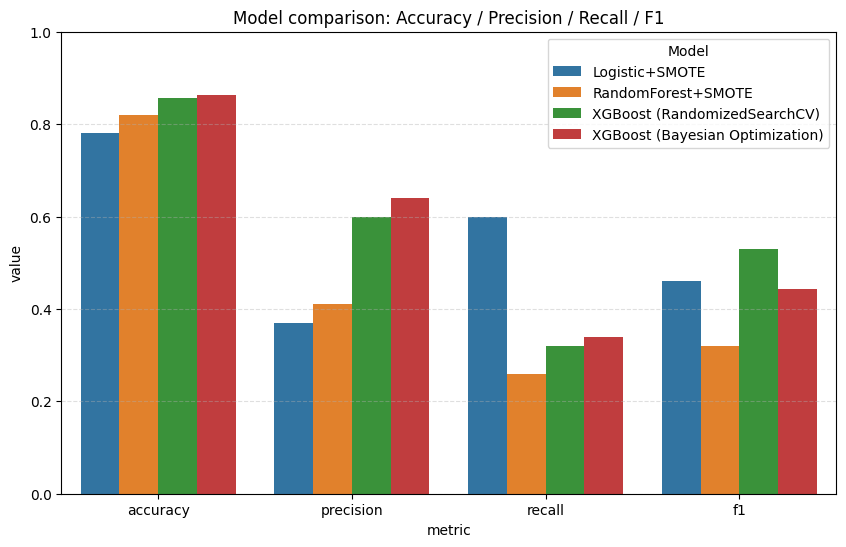

Metrics table:


,accuracy,precision,recall,f1
model,,,,
Logistic+SMOTE,0.780,0.37,0.60,0.460
RandomForest+SMOTE,0.820,0.41,0.26,0.320
XGBoost (RandomizedSearchCV),0.857,0.60,0.32,0.530
XGBoost (Bayesian Optimization),0.864,0.64,0.34,0.444


In [180]:
data = {
    'model': ['Logistic+SMOTE', 'RandomForest+SMOTE', 'XGBoost (RandomizedSearchCV)', 'XGBoost (Bayesian Optimization)'],
    'accuracy': [0.78, 0.82, 0.857, 0.864],
    'precision': [0.37, 0.41, 0.6, 0.64],
    'recall': [0.60, 0.26, 0.32, 0.34],
    'f1': [0.46, 0.32, 0.53, 0.444]
}

df_metrics = pd.DataFrame(data)

# Melt for seaborn
df_melt = df_metrics.melt(id_vars='model', value_vars=['accuracy','precision','recall','f1'],
                          var_name='metric', value_name='value')

plt.figure(figsize=(10,6))
sns.barplot(data=df_melt, x='metric', y='value', hue='model')
plt.ylim(0,1)
plt.title("Model comparison: Accuracy / Precision / Recall / F1")
plt.legend(title='Model')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

# Optional: display metrics table
print("Metrics table:")
display(df_metrics.set_index('model'))

# confusion matrices (from predictions)
cm_logistic = [[197, 50], [18, 29]]   
cm_rf = [[228, 19], [34, 13]]         
cm_xgb = [[212, 35], [21, 26]]     

### So best Model performance is (XGBoost (RandomizedSearchCV))

## Feature importance 

⏳ جاري حساب Permutation Importance ...


,Feature,Mean Importance,Std
0,OverTime_Yes,0.116311,0.014487
1,BusinessTravel_Travel_Frequently,0.034176,0.006912
2,EducationField_Life Sciences,0.020534,0.008191
3,NumCompaniesWorked,0.018994,0.008662
4,StockOptionLevel,0.018875,0.007460
5,JobSatisfaction,0.017153,0.006402
6,TrainingTimesLastYear,0.015548,0.003809
7,EnvironmentSatisfaction,0.014536,0.007788
8,YearsSinceLastPromotion,0.014536,0.003780
9,MaritalStatus_Single,0.012706,0.005025


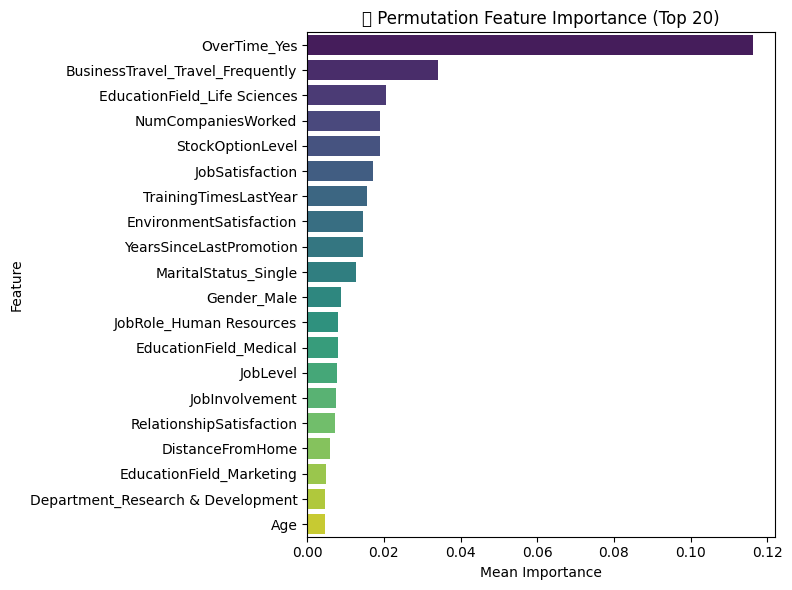

In [ ]:
print("⏳ Permutation Importance ...")

perm = permutation_importance(
    stack_model, X_test, y_test,
    n_repeats=8, random_state=42, n_jobs=-1, scoring='roc_auc'
)
perm_idx = np.argsort(perm.importances_mean)[::-1]
top_features = np.array(X_test.columns)[perm_idx[:20]]

perm_df = pd.DataFrame({
    'Feature': top_features,
    'Mean Importance': perm.importances_mean[perm_idx[:20]],
    'Std': perm.importances_std[perm_idx[:20]]
})
display(perm_df)

plt.figure(figsize=(8, 6))
sns.barplot(x='Mean Importance', y='Feature', data=perm_df, palette='viridis')
plt.title("🎯 Permutation Feature Importance (Top 20)")
plt.tight_layout()
plt.show()

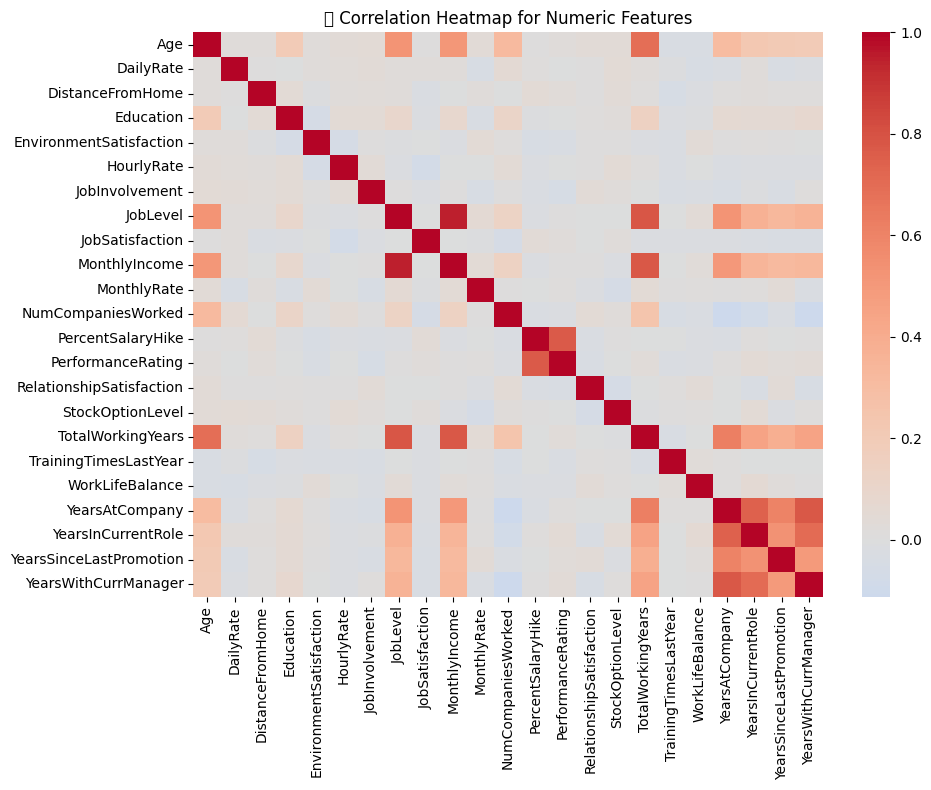

In [197]:
numeric_df = X_train.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', center=0)
plt.title("📊 Correlation Heatmap for Numeric Features")
plt.tight_layout()
plt.show()

In [ ]:
meta_learner = stack_model.final_estimator_
base_models = [name for name, _ in stack_model.estimators]

if hasattr(meta_learner, "coef_"):
    coefs = meta_learner.coef_.flatten()
    imp_df = pd.DataFrame({
        "Base Model": base_models,
        "Coefficient": coefs,
        "Abs_Coefficient": np.abs(coefs)
    }).sort_values("Abs_Coefficient", ascending=False)

    print("📊 Meta-Learner (Stacking) Feature Importance:")
    display(imp_df)
else:
    print("⚠️ The meta-learner does not have coefficients (not a linear model).")

📊 Meta-Learner (Stacking) Feature Importance:


,Base Model,Coefficient,Abs_Coefficient
2,xgb,3.465176,3.465176
0,lr,1.777926,1.777926
1,rf,-0.074891,0.074891


In [217]:
# Extract XGBoost pipeline (index 2) and its classifier
tree_pipeline_index = 2
pipe_used = stack_model.estimators_[tree_pipeline_index]

# Extract classifier (XGB)
tree_model = pipe_used.named_steps['clf']

print("✅ Selected tree model:", type(tree_model))

✅ Selected tree model: <class 'xgboost.sklearn.XGBClassifier'>


In [218]:
# Transform X_test through preprocessing steps (skip SMOTE)
def transform_up_to_clf(pipe, X):
    Xt = X.copy()
    for name, step in pipe.named_steps.items():
        # stop before reaching classifier
        if hasattr(step, 'predict') and not hasattr(step, 'transform'):
            break
        if hasattr(step, 'transform'):
            Xt = step.transform(Xt)
    # convert to numpy array if needed
    if hasattr(Xt, "toarray"):
        Xt = Xt.toarray()
    return Xt

X_sample = X_test.sample(150, random_state=42)
Xt_sample = transform_up_to_clf(pipe_used, X_sample)

print("✅ Transformed sample shape:", Xt_sample.shape)


✅ Transformed sample shape: (150, 44)


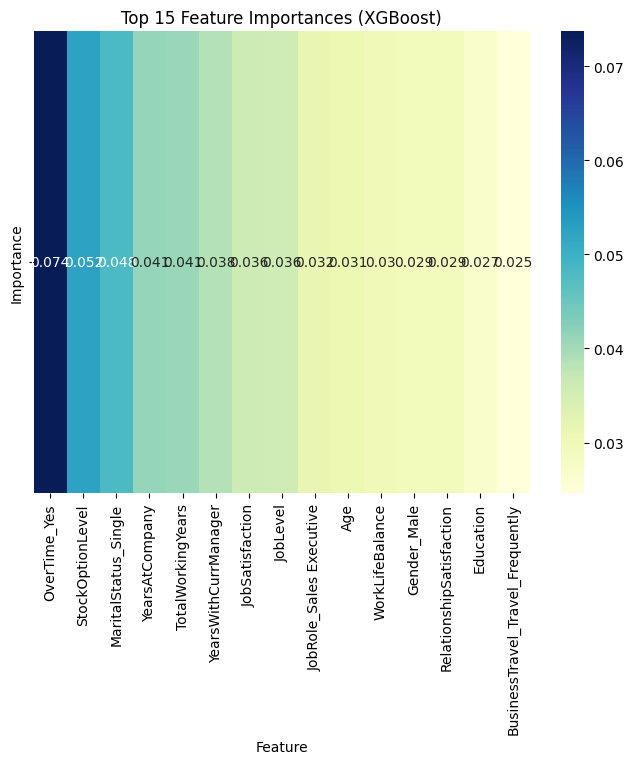

In [221]:
# extract feature importance directly from XGBoost
importance = tree_model.feature_importances_

feat_imp_df = pd.DataFrame({
    'Feature': feat_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(8,6))
sns.heatmap(feat_imp_df.set_index('Feature').T, cmap='YlGnBu', annot=True)
plt.title("Top 15 Feature Importances (XGBoost)")
plt.show()

## Final Model Evaluation

In [ ]:
try:
    y_pred
    print("✅ y_pred is there ")
except NameError:
    print("y_pred not available")
    model = joblib.load(r"D:\Reports\DEPI\PROJECT\best_final_stacking_model.pkl") 
    y_pred = model.predict(use_X)
    try:
        y_proba = model.predict_proba(use_X)[:,1]
    except Exception:
        y_proba = None

# 2) Metrics 
if use_y is not None:
    acc = accuracy_score(use_y, y_pred)
    prec = precision_score(use_y, y_pred, zero_division=0)
    rec = recall_score(use_y, y_pred, zero_division=0)
    f1 = f1_score(use_y, y_pred, zero_division=0)
    rocauc = roc_auc_score(use_y, y_proba) if (y_proba is not None) else None

    print("=== Evaluation on dataset ===")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")
    if rocauc is not None:
        print(f"ROC AUC:   {rocauc:.4f}")
    print("\nClassification report:\n")
    print(classification_report(use_y, y_pred, zero_division=0))
else:
    print(" NONE ")

✅ y_pred is there 
=== Evaluation on dataset ===
Accuracy:  0.8449
Precision: 0.5120
Recall:    0.8101
F1-score:  0.6275
ROC AUC:   0.9101

Classification report:

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1233
           1       0.51      0.81      0.63       237

    accuracy                           0.84      1470
   macro avg       0.74      0.83      0.76      1470
weighted avg       0.89      0.84      0.86      1470



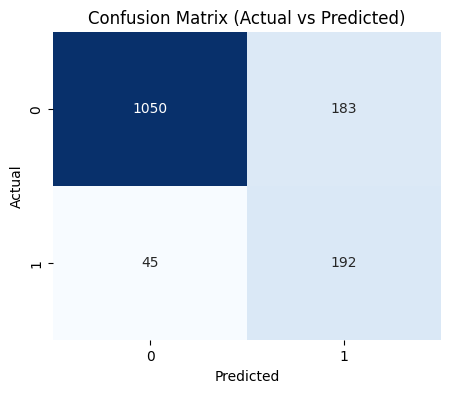

In [17]:
# 4) Confusion Matrix plot (if labels exist)
if use_y is not None:
    cm = confusion_matrix(use_y, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title("Confusion Matrix (Actual vs Predicted)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

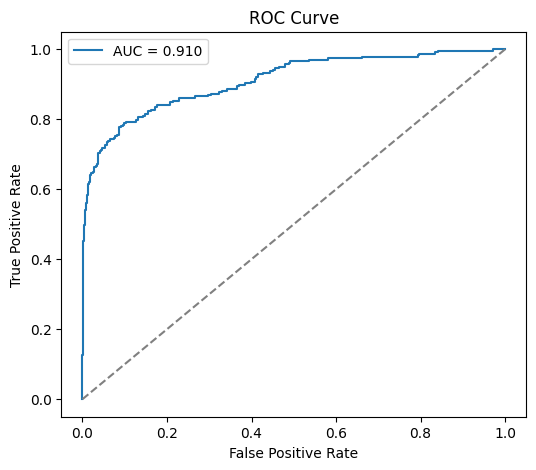

In [ ]:
# 5) ROC curve (if probabilities exist)
if use_y is not None and (y_proba is not None):
    fpr, tpr, _ = roc_curve(use_y, y_proba)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f"AUC = {auc(fpr,tpr):.3f}")
    plt.plot([0,1],[0,1],'--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()
elif use_y is not None:
    print("ERROR no probabilities exist.")
